**Muhammad Fariz**

Capstone Project Machine Learning

**Klasifikasi Jenis Ikan**

---



---
Dataset ini menyediakan berbagai gambar dari jenis-jenis ikan. Pada tugas kali ini akan mengklasifikasikan 5 jenis ikan yaitu :
1. Black Sea Sprat
2. Red Sea Bream
3. Sea Bass
4. Shrimp
5. Trout

Masing-masing dari folder jenis ikan ini memiliki 400 gambar dari ikan tersebut. Dari gambar tersebut akan dibuat sebuah model untuk dapat mengklasifikasikan jenis-jenis ikan.




In [18]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from google.colab import drive
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from google.colab import files
from IPython.display import display, Image
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder = '/content/drive/MyDrive/Fish/'

In [4]:
gambar = []
label = []

for subfolder in os.listdir(folder):
    subfolder_path = os.path.join(folder, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        gambar.append(image_path)

        label.append(subfolder)

In [5]:
data = pd.DataFrame({'image': gambar, 'label': label})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['image'], data['label'], test_size=0.2, random_state=42)

data_train = pd.DataFrame({'image': X_train, 'label': y_train})

data_test = pd.DataFrame({'image': X_test, 'label': y_test})

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [7]:
image_size = (50, 50)
batch_size =32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
train_generator = datagen.flow_from_dataframe(
    data_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    data_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1600 validated image filenames belonging to 5 classes.
Found 400 validated image filenames belonging to 5 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(5, activation="softmax")
])

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model_checkpoint = ModelCheckpoint("hasil_model.h5", save_best_only=True, save_weights_only=False, monitor="val_accuracy", mode="max", verbose=1)

history = model.fit(
    train_generator,
    epochs=30,
    batch_size=32,
    validation_data=test_generator,
    callbacks=[model_checkpoint]
)

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 1.3782 - accuracy: 0.3988
Epoch 1: val_accuracy improved from -inf to 0.69000, saving model to hasil_model.h5
50/50 [==============================] - 607s 12s/step - loss: 1.3782 - accuracy: 0.3988 - val_loss: 0.9348 - val_accuracy: 0.6900
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 0.7765 - accuracy: 0.6950
Epoch 2: val_accuracy improved from 0.69000 to 0.77500, saving model to hasil_model.h5
50/50 [==============================] - 40s 795ms/step - loss: 0.7765 - accuracy: 0.6950 - val_loss: 0.6117 - val_accuracy: 0.7750
Epoch 3/30
50/50 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.7550
Epoch 3: val_accuracy did not improve from 0.77500
50/50 [==============================] - 33s 661ms/step - loss: 0.5971 - accuracy: 0.7550 - val_loss: 0.5316 - val_accuracy: 0.7750
Epoch 4/30
50/50 [==============================] - ETA: 0s - loss: 0.4690 - accuracy: 0.8106
Epoch 4

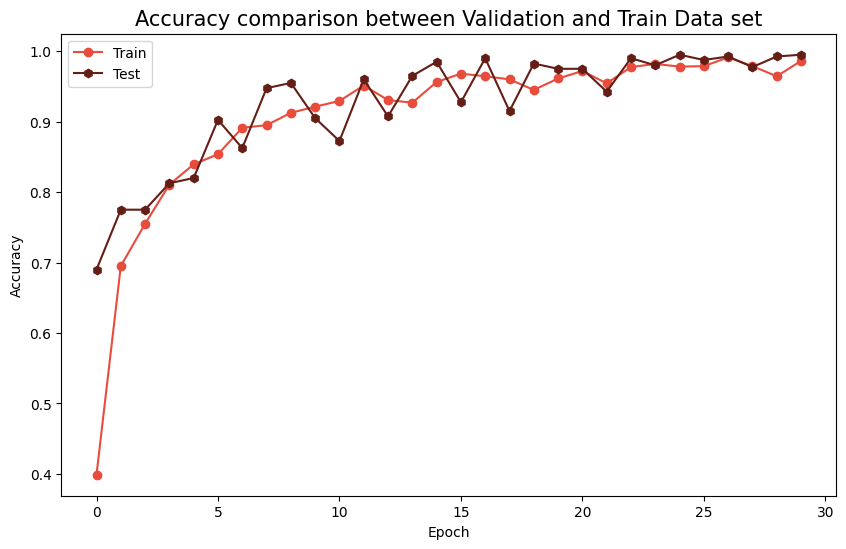

In [12]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


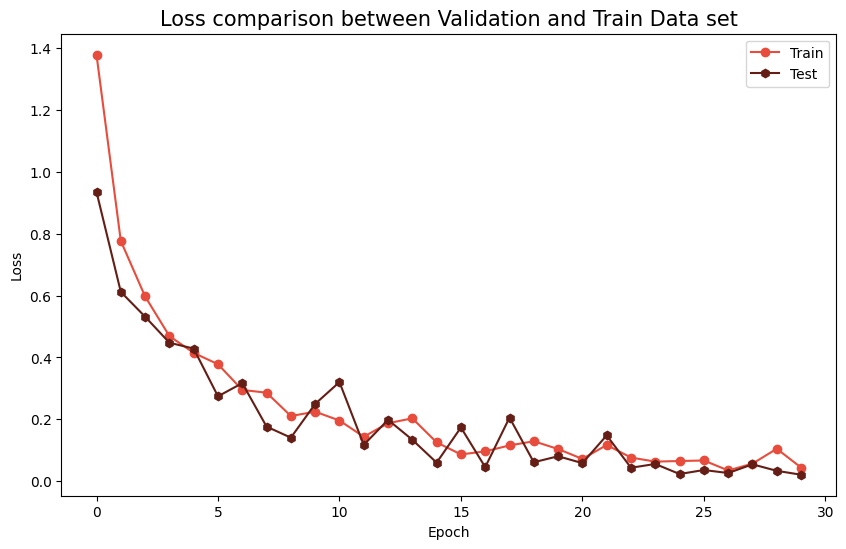

In [13]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color="#E74C3C", marker='o')
plt.plot(history.history['val_loss'], color='#641E16', marker='h')
plt.title('Loss comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [17]:
metrics = model.evaluate(test_generator)

print('Accuracy:', metrics[1])

13/13 [==============================] - 5s 411ms/step - loss: 0.0269 - accuracy: 0.9875
Accuracy: 0.987500011920929


Saving Female_Rainbow_Trout_in_hand.JPG to Female_Rainbow_Trout_in_hand.JPG
Nama file : "Female_Rainbow_Trout_in_hand.JPG". Ukuran file : 52804 bytes
1/1 [==============================] - 0s 23ms/step


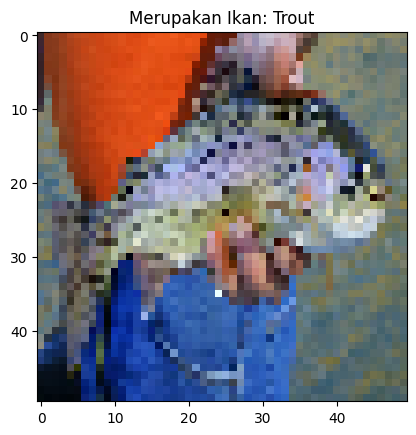

In [15]:
def gambar():
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('Nama file : "{name}". Ukuran file : {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    return list(uploaded.keys())[0]

jalur_gambar = gambar()

img = image.load_img(jalur_gambar, target_size=(50, 50))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediksi = model.predict(img_array)
index = np.argmax(prediksi)
label = {0: "Black Sea Sprat", 1: "Red Sea Bream", 2: "Sea Bass", 3:"Shrimp", 4:"Trout"}
class_prediksi = label[index]

plt.imshow(img)
plt.title(f'Merupakan Ikan: {class_prediksi}')
plt.show()